In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.classification import *
from pycaret.utils import check_metric
from IPython.display import display

In [2]:
# Getting the Data
dataset = get_data('credit')
dataset.drop(['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis='columns', inplace=True)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [3]:
#check the shape of data
dataset.shape

(24000, 18)

In [4]:
print(dataset.nunique())

LIMIT_BAL       80
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
BILL_AMT1    18660
BILL_AMT2    18363
BILL_AMT3    18134
BILL_AMT4    17733
BILL_AMT5    17312
BILL_AMT6    16963
PAY_AMT1      6938
PAY_AMT2      6904
PAY_AMT3      6589
PAY_AMT4      6036
PAY_AMT5      5985
PAY_AMT6      6047
default          2
dtype: int64


In [5]:
cat_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [6]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22800, 18)
Unseen Data For Predictions: (1200, 18)


In [7]:
# Setting up Environment in PyCaret
experiment = setup(dataset, target='default', categorical_features=cat_features, silent=True, experiment_name='credit')

,Description,Value
0,session_id,1488
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(24000, 18)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
# Comparing All Models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7913,0.7279,0.1893,0.5705,0.2840,0.1964,0.2377,3.3890
gbc,Gradient Boosting Classifier,0.7909,0.7271,0.1466,0.5890,0.2346,0.1616,0.2148,1.6480
ada,Ada Boost Classifier,0.7906,0.7159,0.1374,0.5925,0.2228,0.1532,0.2088,0.3550
lightgbm,Light Gradient Boosting Machine,0.7903,0.7244,0.1950,0.5595,0.2890,0.1985,0.2367,0.1230
xgboost,Extreme Gradient Boosting,0.7869,0.7072,0.2337,0.5297,0.3241,0.2196,0.2457,9.8170
rf,Random Forest Classifier,0.7865,0.7054,0.1730,0.5381,0.2616,0.1738,0.2123,1.0160
ridge,Ridge Classifier,0.7812,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0180
lda,Linear Discriminant Analysis,0.7812,0.6428,0.0000,0.0000,0.0000,0.0000,0.0000,0.0340
dummy,Dummy Classifier,0.7812,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0180
lr,Logistic Regression,0.7811,0.6415,0.0000,0.0000,0.0000,-0.0001,-0.0013,0.3240


In [9]:
print(best_model)

In [10]:
predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7896,0.7247,0.1865,0.6166,0.2864,0.2026,0.2528


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,default,Label,Score
0,120000.0,41.0,118847.0,113190.0,114113.0,111593.0,112533.0,111672.0,5000.0,6000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.8904
1,160000.0,25.0,227.0,0.0,354.0,355.0,47.0,605.0,861.0,354.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.8570
2,10000.0,22.0,8925.0,8637.0,10277.0,9736.0,9704.0,9725.0,0.0,1800.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0.5690
3,240000.0,34.0,11874.0,5979.0,6938.0,41858.0,10416.0,1711.0,0.0,6938.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.8605
4,100000.0,54.0,81507.0,83154.0,88223.0,85924.0,86803.0,88745.0,3900.0,7300.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0.6100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,450000.0,44.0,32000.0,3417.0,4700.0,20916.0,9695.0,6361.0,3423.0,4700.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9533
7197,150000.0,36.0,127204.0,247984.0,125502.0,129589.0,133145.0,139322.0,5900.0,5000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0.8878
7198,700000.0,34.0,3609.0,6109.0,5810.0,7684.0,168.0,5836.0,6168.0,7105.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9823
7199,50000.0,40.0,42549.0,36110.0,9715.0,8965.0,6652.0,7385.0,2200.0,2000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.8261


In [11]:
# Predict on test
predict_model(best_model, data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8183,0.8359,0.2433,0.7711,0.3699,0.2959,0.3637


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.8962
1,380000,1,2,2,32,22401.0,21540.0,15134.0,32018.0,11849.0,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9843
2,200000,2,2,1,32,9076.0,5787.0,-684.0,5247.0,3848.0,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.9438
3,200000,1,1,1,53,138180.0,140774.0,142460.0,144098.0,147124.0,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,0,0.8416
4,240000,1,1,2,41,95.0,2622.0,3301.0,3164.0,360.0,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.6878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,50000,1,2,1,37,10904.0,9316.0,4328.0,2846.0,1585.0,1324.0,0.0,3000.0,0.0,0.0,1000.0,1000.0,1,1,0.5360
1196,220000,1,2,1,41,45075.0,8840.0,1369.0,5924.0,1759.0,1824.0,8840.0,6643.0,5924.0,1759.0,1824.0,7022.0,0,0,0.9274
1197,420000,1,1,2,34,131939.0,136721.0,140011.0,141695.0,144839.0,147954.0,7000.0,7000.0,5500.0,5500.0,5600.0,5000.0,0,0,0.9206
1198,90000,1,2,1,36,7752.0,9112.0,10306.0,11328.0,12036.0,14329.0,1500.0,1500.0,1500.0,1200.0,2500.0,0.0,1,0,0.6295


In [12]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [13]:
ensembled_models_lst = models(type='ensemble').index.tolist()
print(ensembled_models_lst)

['rf', 'ada', 'gbc', 'et', 'xgboost', 'lightgbm', 'catboost']


In [14]:
ensembled_models = compare_models(ensembled_models_lst, fold = 10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7913,0.7279,0.1893,0.5705,0.2840,0.1964,0.2377,3.4620
gbc,Gradient Boosting Classifier,0.7909,0.7271,0.1466,0.5890,0.2346,0.1616,0.2148,1.6810
ada,Ada Boost Classifier,0.7906,0.7159,0.1374,0.5925,0.2228,0.1532,0.2088,0.3850
lightgbm,Light Gradient Boosting Machine,0.7903,0.7244,0.1950,0.5595,0.2890,0.1985,0.2367,0.1370
xgboost,Extreme Gradient Boosting,0.7869,0.7072,0.2337,0.5297,0.3241,0.2196,0.2457,10.1290
rf,Random Forest Classifier,0.7865,0.7054,0.1730,0.5381,0.2616,0.1738,0.2123,1.0990
et,Extra Trees Classifier,0.7765,0.6683,0.1080,0.4551,0.1745,0.0989,0.1337,0.5370


In [15]:
# Decision Tree Classifier
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6982,0.5672,0.3351,0.3187,0.3267,0.1324,0.1324
1,0.7173,0.5902,0.3651,0.3564,0.3607,0.1792,0.1793
2,0.6863,0.5628,0.3433,0.3058,0.3235,0.1202,0.1205
3,0.6833,0.5558,0.3288,0.2980,0.3127,0.1076,0.1078
4,0.7060,0.5792,0.3505,0.3359,0.3431,0.1538,0.1538
5,0.6946,0.5661,0.3342,0.3146,0.3241,0.1271,0.1272
6,0.6935,0.5627,0.3315,0.3120,0.3215,0.1237,0.1238
7,0.6958,0.5741,0.3587,0.3243,0.3406,0.1436,0.1439
8,0.6857,0.5622,0.3451,0.3068,0.3248,0.1209,0.1213


In [16]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1488, splitter='best')


In [17]:
# Tune a Model - Decision Tree Classifier
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7756,0.6488,0.1335,0.4537,0.2063,0.1188,0.1492
1,0.7869,0.6819,0.1362,0.5495,0.2183,0.1440,0.1917
2,0.7798,0.6615,0.1880,0.4894,0.2717,0.1711,0.1985
3,0.7851,0.6642,0.1060,0.5493,0.1777,0.1150,0.1677
4,0.7857,0.6846,0.1114,0.5541,0.1855,0.1211,0.1739
5,0.7923,0.6762,0.1658,0.5922,0.2590,0.1805,0.2306
6,0.7905,0.6998,0.1141,0.6176,0.1927,0.1335,0.1979
7,0.7917,0.6682,0.2418,0.5562,0.3371,0.2356,0.2645
8,0.7798,0.6533,0.1957,0.4932,0.2802,0.1778,0.2045


In [18]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1488, splitter='best')


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


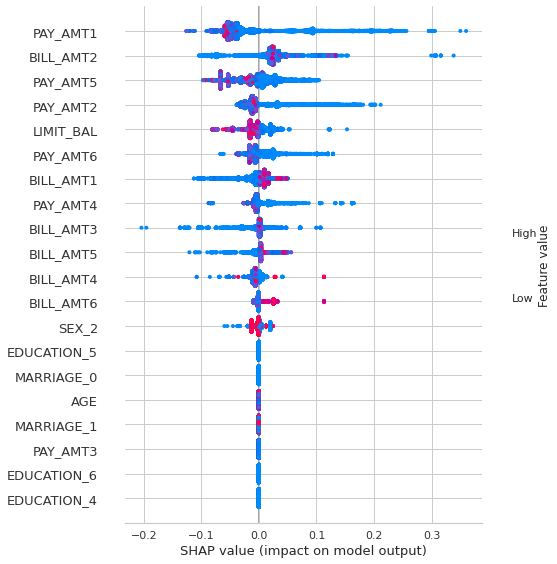

In [19]:
# Interpret Model
interpret_model(tuned_dt)

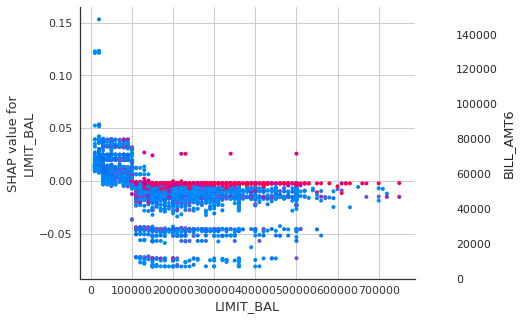

In [20]:
interpret_model(tuned_dt, plot = 'correlation')

In [21]:
#Ensemble Model
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7345,0.5999,0.2970,0.3670,0.3283,0.1652,0.1666
1,0.7470,0.6231,0.2725,0.3876,0.3200,0.1704,0.1744
2,0.7292,0.5985,0.2589,0.3417,0.2946,0.1309,0.1329
3,0.7220,0.5799,0.2228,0.3118,0.2599,0.0946,0.0966
4,0.7262,0.6077,0.3315,0.3631,0.3466,0.1739,0.1741
5,0.7429,0.6247,0.3179,0.3926,0.3514,0.1932,0.1949
6,0.7214,0.6399,0.3261,0.3529,0.3390,0.1629,0.1631
7,0.7208,0.6261,0.2690,0.3311,0.2969,0.1250,0.1261
8,0.7351,0.6021,0.2772,0.3630,0.3143,0.1538,0.1560


In [22]:
# K Neighbors Classifier
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7411,0.5971,0.1717,0.3247,0.2246,0.0866,0.0929
1,0.7446,0.5758,0.1390,0.3110,0.1921,0.0661,0.0736
2,0.7577,0.6149,0.1689,0.3780,0.2335,0.1140,0.1270
3,0.7423,0.6148,0.1440,0.3099,0.1967,0.0670,0.0740
4,0.7637,0.6156,0.1821,0.4110,0.2524,0.1362,0.1522
5,0.7655,0.6099,0.1739,0.4156,0.2452,0.1332,0.1510
6,0.7571,0.6148,0.1766,0.3824,0.2416,0.1198,0.1325
7,0.7399,0.5713,0.1603,0.3155,0.2126,0.0763,0.0825
8,0.7595,0.6095,0.1821,0.3941,0.2491,0.1284,0.1420


In [23]:
# Tune a Model - K Neighbors Classifier
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(1,31,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7821,0.6302,0.0817,0.5085,0.1408,0.0855,0.1339
1,0.7762,0.6366,0.0545,0.4082,0.0962,0.0471,0.0796
2,0.7863,0.6600,0.0899,0.5690,0.1553,0.1017,0.1604
3,0.7815,0.6814,0.0734,0.5094,0.1283,0.0774,0.1267
4,0.7810,0.6432,0.0625,0.5000,0.1111,0.0656,0.1140
5,0.7792,0.6533,0.0679,0.4717,0.1188,0.0673,0.1103
6,0.7827,0.6792,0.0761,0.5283,0.1330,0.0824,0.1350
7,0.7774,0.6314,0.0625,0.4423,0.1095,0.0585,0.0965
8,0.7815,0.6490,0.0815,0.5085,0.1405,0.0851,0.1335


In [24]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')


In [25]:
# Random Forest Classifier
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7851,0.6877,0.1635,0.5263,0.2495,0.1628,0.2010
1,0.7833,0.7049,0.1689,0.5124,0.2541,0.1635,0.1982
2,0.7833,0.6969,0.1853,0.5113,0.2720,0.1763,0.2078
3,0.7810,0.7138,0.1522,0.5000,0.2333,0.1460,0.1815
4,0.7917,0.7059,0.1848,0.5763,0.2798,0.1941,0.2374
5,0.7935,0.7050,0.1929,0.5868,0.2904,0.2041,0.2477
6,0.7929,0.7302,0.1739,0.5926,0.2689,0.1882,0.2367
7,0.7869,0.6979,0.1712,0.5431,0.2603,0.1736,0.2134
8,0.7881,0.6917,0.1929,0.5462,0.2851,0.1928,0.2290


In [26]:
# Tune a Model - Random Forest Classifier
tuned_rf = tune_model(rf, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7833,0.6906,0.1689,0.5124,0.2541,0.1635,0.1982
1,0.7887,0.7098,0.1662,0.5545,0.2558,0.1724,0.2153
2,0.7881,0.7227,0.1635,0.5505,0.2521,0.1690,0.2116
3,0.7887,0.7281,0.1685,0.5586,0.2589,0.1751,0.2183
4,0.7935,0.7347,0.1875,0.5897,0.2845,0.2000,0.2452
5,0.7917,0.7244,0.1875,0.5750,0.2828,0.1962,0.2387
6,0.7988,0.7341,0.1848,0.6415,0.2869,0.2095,0.2651
7,0.7929,0.7126,0.1766,0.5909,0.2720,0.1903,0.2380
8,0.7869,0.6910,0.1984,0.5368,0.2897,0.1945,0.2280


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


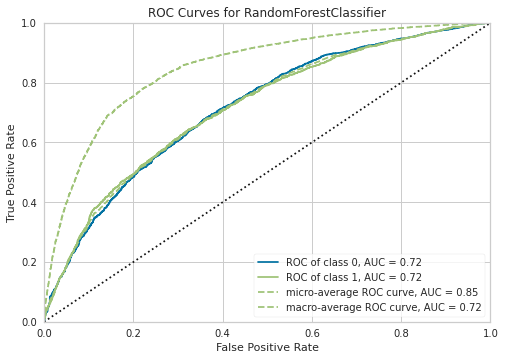

In [27]:
# Plot a Model - AUC Plot
plot_model(tuned_rf, plot = 'auc')

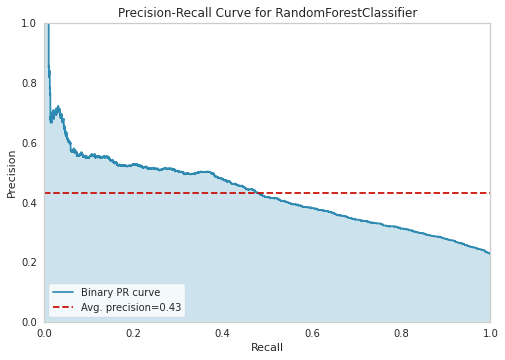

In [28]:
# Plot a Model - Precision-Recall Curve
plot_model(tuned_rf, plot = 'pr')

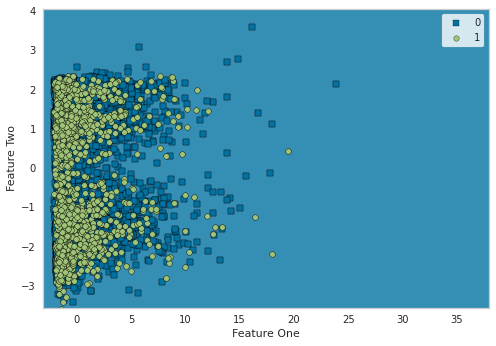

In [29]:
plot_model(tuned_rf, plot = 'boundary')

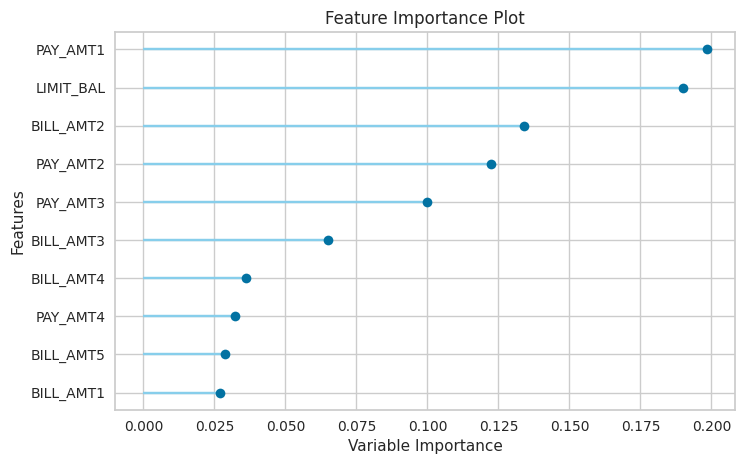

In [30]:
# Plot a Model - Feature Importance Plot
plot_model(tuned_rf, plot='feature')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


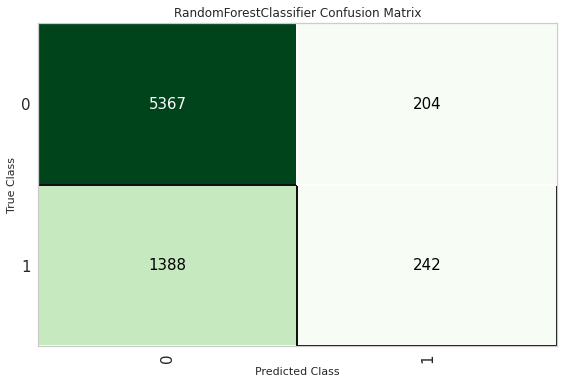

In [31]:
# Plot a Model - Confusion Matrix
plot_model(tuned_rf, plot = 'confusion_matrix')

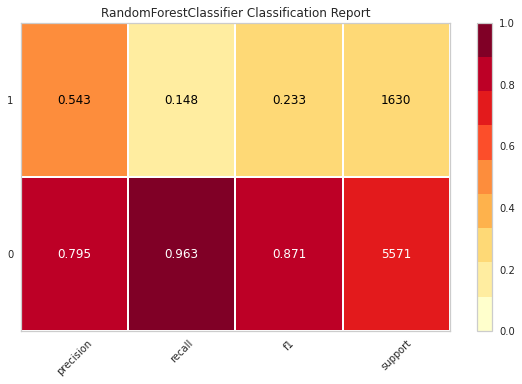

In [32]:
plot_model(tuned_rf, plot = 'class_report')

In [33]:
# Finalize Model for Deployment
final_rf = finalize_model(tuned_rf)

In [34]:
#Final Random Forest model parameters for deployment
print(final_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=7, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=240,
                       n_jobs=-1, oob_score=False, random_state=1488, verbose=0,
                       warm_start=False)


In [35]:
predict_model(final_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7800,0.7258,0.1337,0.5590,0.2158,0.1407,0.1902


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,default,Label,Score
0,120000.0,41.0,118847.0,113190.0,114113.0,111593.0,112533.0,111672.0,5000.0,6000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.8598
1,160000.0,25.0,227.0,0.0,354.0,355.0,47.0,605.0,861.0,354.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.8030
2,10000.0,22.0,8925.0,8637.0,10277.0,9736.0,9704.0,9725.0,0.0,1800.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0.5338
3,240000.0,34.0,11874.0,5979.0,6938.0,41858.0,10416.0,1711.0,0.0,6938.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.5721
4,100000.0,54.0,81507.0,83154.0,88223.0,85924.0,86803.0,88745.0,3900.0,7300.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0.5414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,450000.0,44.0,32000.0,3417.0,4700.0,20916.0,9695.0,6361.0,3423.0,4700.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9260
7197,150000.0,36.0,127204.0,247984.0,125502.0,129589.0,133145.0,139322.0,5900.0,5000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0.8551
7198,700000.0,34.0,3609.0,6109.0,5810.0,7684.0,168.0,5836.0,6168.0,7105.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9284
7199,50000.0,40.0,42549.0,36110.0,9715.0,8965.0,6652.0,7385.0,2200.0,2000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.7927


In [36]:
# Predict on unseen data
unseen_predictions = predict_model(final_rf, data=data_unseen)
display(unseen_predictions)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7850,0.7387,0.1369,0.5373,0.2182,0.1418,0.1870


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.7752
1,380000,1,2,2,32,22401.0,21540.0,15134.0,32018.0,11849.0,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9475
2,200000,2,2,1,32,9076.0,5787.0,-684.0,5247.0,3848.0,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.8291
3,200000,1,1,1,53,138180.0,140774.0,142460.0,144098.0,147124.0,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,0,0.8502
4,240000,1,1,2,41,95.0,2622.0,3301.0,3164.0,360.0,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.8059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,50000,1,2,1,37,10904.0,9316.0,4328.0,2846.0,1585.0,1324.0,0.0,3000.0,0.0,0.0,1000.0,1000.0,1,1,0.5283
1196,220000,1,2,1,41,45075.0,8840.0,1369.0,5924.0,1759.0,1824.0,8840.0,6643.0,5924.0,1759.0,1824.0,7022.0,0,0,0.9237
1197,420000,1,1,2,34,131939.0,136721.0,140011.0,141695.0,144839.0,147954.0,7000.0,7000.0,5500.0,5500.0,5600.0,5000.0,0,0,0.8616
1198,90000,1,2,1,36,7752.0,9112.0,10306.0,11328.0,12036.0,14329.0,1500.0,1500.0,1500.0,1200.0,2500.0,0.0,1,0,0.7944


In [37]:
check_metric(unseen_predictions['default'], unseen_predictions['Label'], metric = 'Accuracy')

0.785

In [38]:
# Saving the model
save_model(final_rf,'final-rf-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['SEX', 'EDUCATION',
                                                             'MARRIAGE'],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_valu...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=7, max_features=1.0,
                      

In [39]:
# Loading the saved model
saved_final_rf = load_model('final-rf-model')

Transformation Pipeline and Model Successfully Loaded


In [40]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7850,0.7387,0.1369,0.5373,0.2182,0.1418,0.1870


In [42]:
check_metric(new_prediction['default'], new_prediction['Label'], metric = 'Accuracy')

0.785